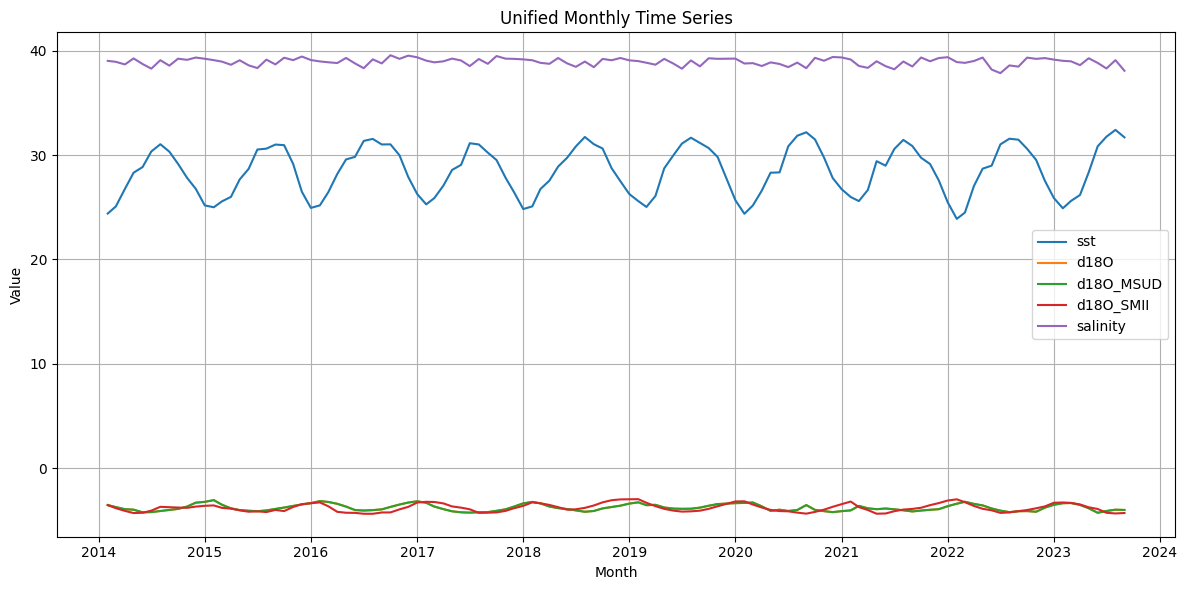

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the unified dataset
df = pd.read_csv("unified_datasets.csv")
df["month"] = pd.to_datetime(df["month"].astype(str))  # convert Period to datetime for plotting
df = df.dropna()

# Plot each column
plt.figure(figsize=(12, 6))
for col in df.columns:
    if col != "month":
        plt.plot(df["month"], df[col], label=col)

plt.title("Unified Monthly Time Series")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

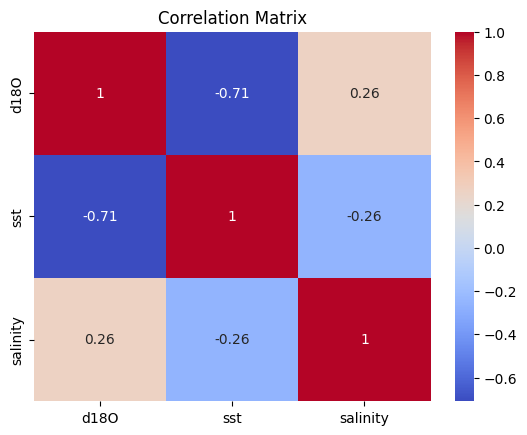

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Pearson correlation matrix
correlation_matrix = df[['d18O', 'sst', 'salinity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     58.29
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           4.47e-18
Time:                        16:47:33   Log-Likelihood:                 10.196
No. Observations:                 115   AIC:                            -14.39
Df Residuals:                     112   BIC:                            -6.157
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.021   -180.700      0.0

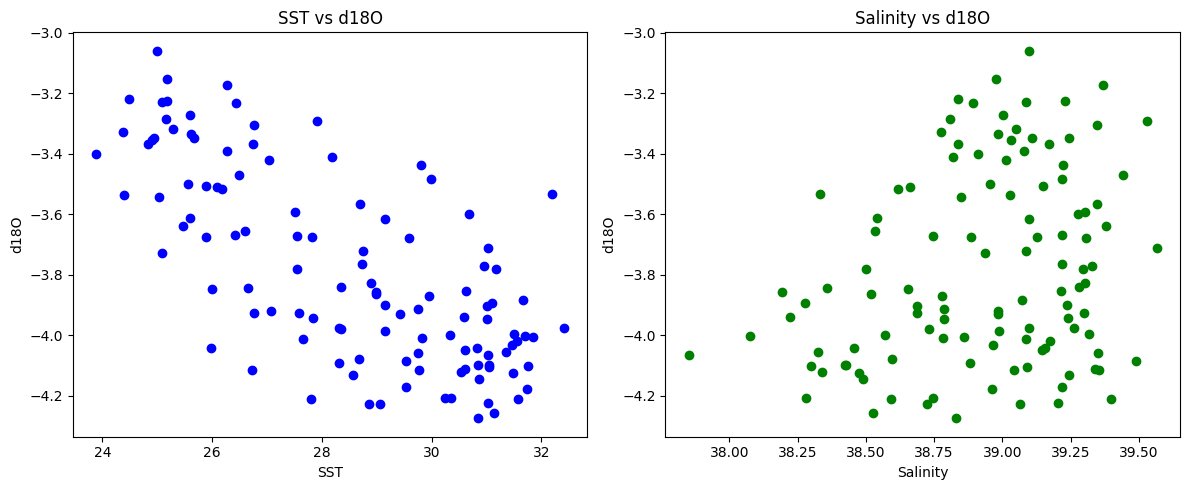

In [ ]:
# Multiple Linear Regression
X = df[['sst', 'salinity']]
y = df['d18O']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()
print(model.summary())

# Visualize
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(df['sst'], df['d18O'], color='blue')
axs[0].set_title("SST vs d18O")
axs[0].set_xlabel("SST")
axs[0].set_ylabel("d18O")

axs[1].scatter(df['salinity'], df['d18O'], color='green')
axs[1].set_title("Salinity vs d18O")
axs[1].set_xlabel("Salinity")
axs[1].set_ylabel("d18O")

plt.tight_layout()
plt.show()

# Results

**Statistically significant** negative correlation between SST and d18O.
- Pearson correlation of $-0.71$.
- Slope coefficient of $-0.2178$.
- $p < 0.001$.

Statistically *in*significant positive correlation between SSS and d18O.
- Pearson correlation of $0.26$.
- Slope coefficient of $0.0258$.
- $p = 0.235 > 0.05$.